In [7]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

from util.utils import run_experiment_multi_seed, runner_results_to_stats, plot_fitness_iteration, get_optimal_hyperparameters
from util.utils import plot_fitness_vs_hyperparameter, plot_HP_heatmap, plot_fitness_fevals

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


%load_ext autoreload
%autoreload 2

# Fixed random seed for reproducibility on random optimization problems
FIXED_SEED = 42
np.random.seed(FIXED_SEED)
# Random Seeds for reproducibility
RANDOM_SEEDS = [1, 2, 3, 4, 5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)

In [80]:
# generate a np array of 15 ones followed by 15 zeros
best_1 = np.hstack((np.ones(44),np.zeros(6)))
best_2 = np.hstack((np.ones(6),np.zeros(44)))

fitness.evaluate(best_1)
fitness.evaluate(best_2)

94

In [10]:
fitness = mlrose_hiive.FourPeaks()
problem_easy = mlrose_hiive.DiscreteOpt(length = 30, fitness_fn = fitness, maximize=True, max_val=2)
problem_medium = mlrose_hiive.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
problem_hard = mlrose_hiive.DiscreteOpt(length = 80, fitness_fn = fitness, maximize=True, max_val=2)

In [32]:
rhc = RHCRunner(
                problem=problem_medium,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[0],
                max_attempts=1200,
                )

rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)



<Figure size 640x480 with 0 Axes>

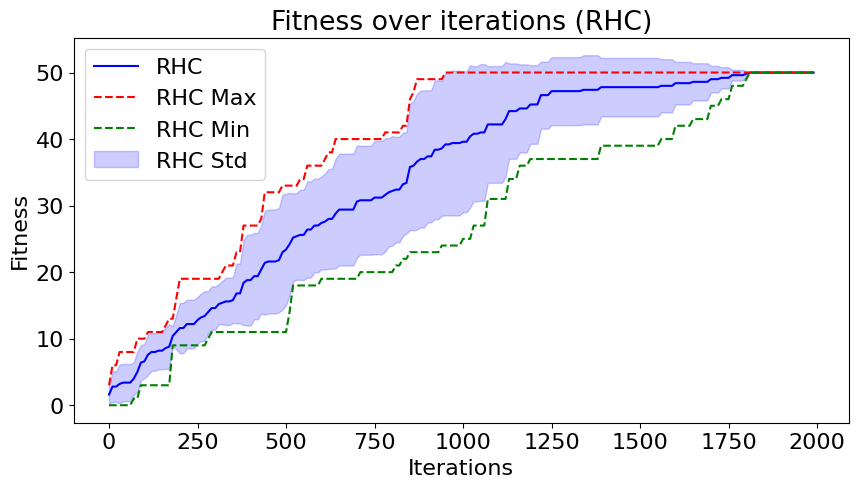

Best Fitness: 50.0


In [33]:
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

<Figure size 640x480 with 0 Axes>

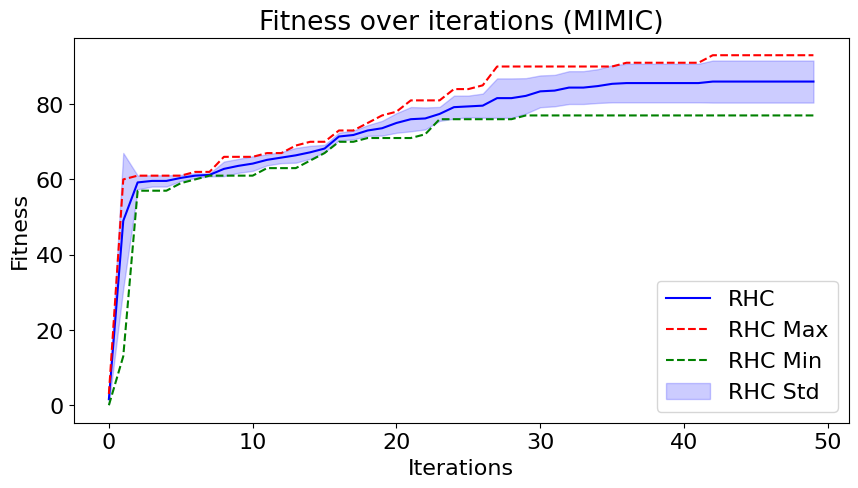

<Figure size 640x480 with 0 Axes>

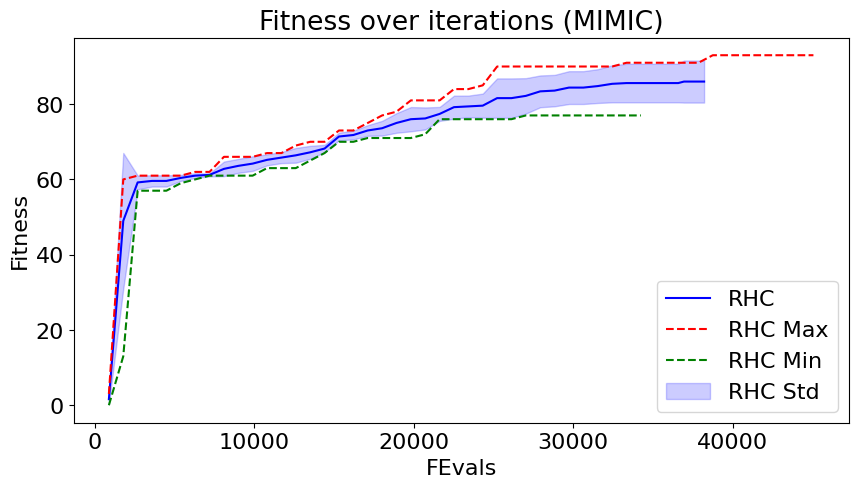

Best Fitness: 86.0


In [100]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

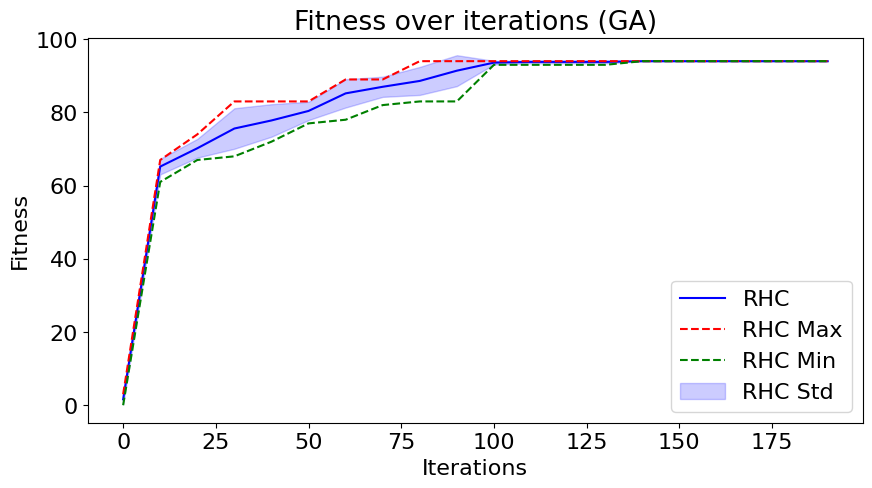

<Figure size 640x480 with 0 Axes>

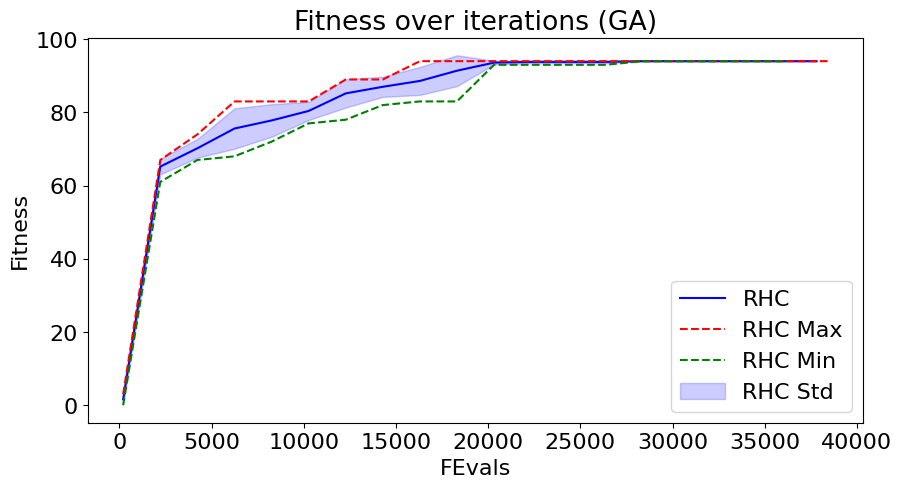

Best Fitness: 94.0


In [101]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

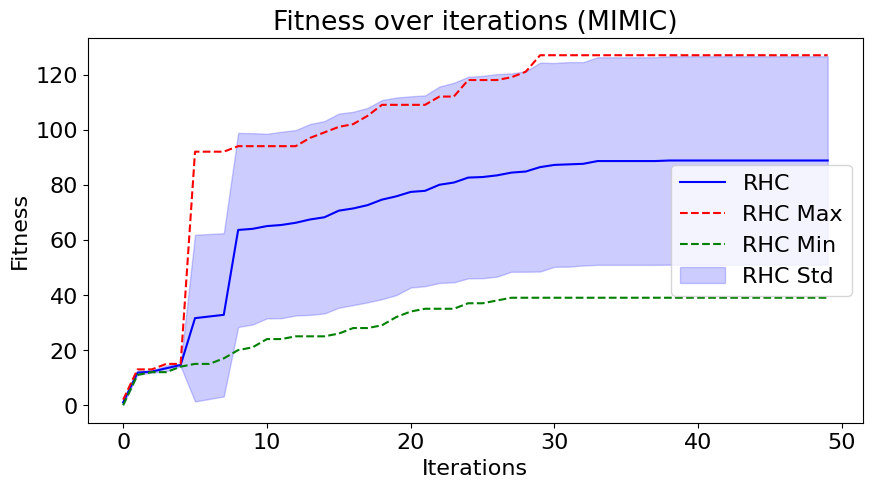

<Figure size 640x480 with 0 Axes>

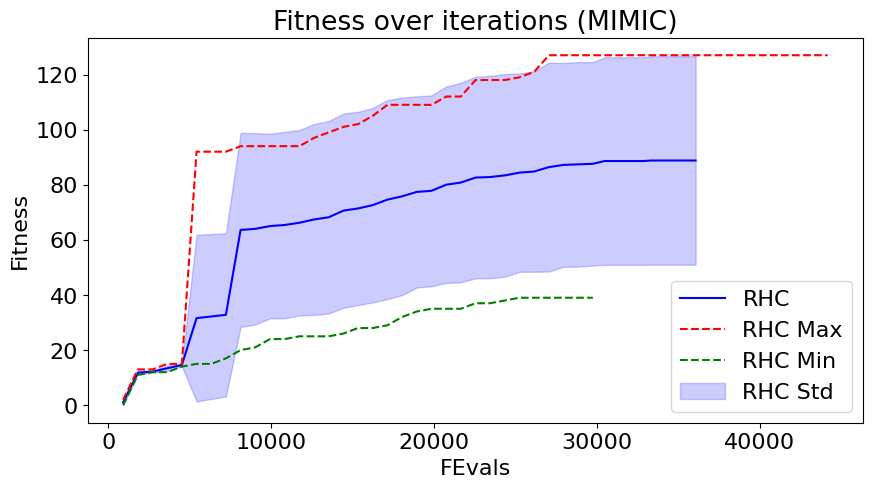

Best Fitness: 88.8


In [102]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

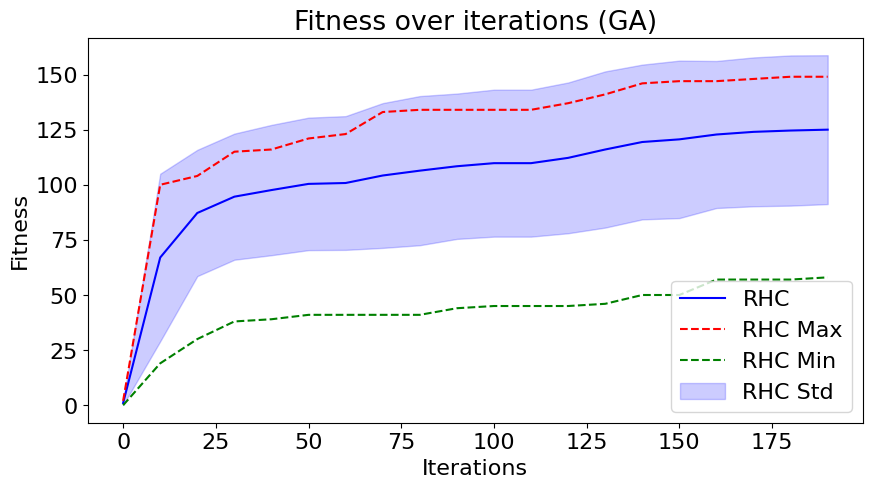

<Figure size 640x480 with 0 Axes>

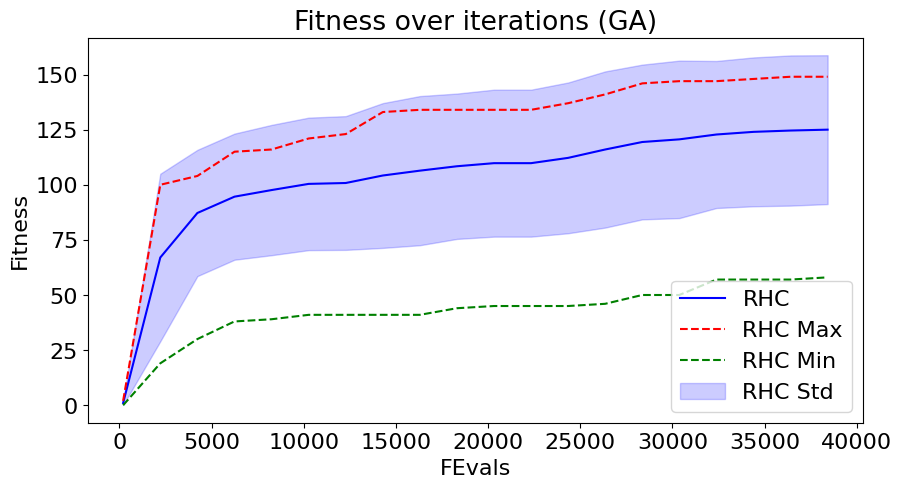

Best Fitness: 125.0


In [103]:
ga = GARunner(problem=problem_hard,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')
